In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
###os.environ["DML_VISIBLE_DEVICES"] = "0" 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import cv2
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

ModuleNotFoundError: No module named 'seaborn'

# Load the file from the dataset

In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'archive/train',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'archive/test',
        target_size=(128,128),
        batch_size=64,
        class_mode='categorical')

Found 2352 images belonging to 7 classes.
Found 586 images belonging to 7 classes.


In [3]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Split the dataset into test , train

# CNN Model to predict the Mood 

In [4]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(3, 3)))
emotion_model.add(Dropout(0.5))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(3, 3)))
emotion_model.add(Dropout(0.5))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
history=emotion_model.fit(train_generator,epochs=20,validation_data=validation_generator)


Epoch 1/20
37/37 [==============================] - 124s 3s/step - loss: 2.2274 - accuracy: 0.1395 - val_loss: 1.9459 - val_accuracy: 0.1416
Epoch 2/20
37/37 [==============================] - 124s 3s/step - loss: 1.9440 - accuracy: 0.1441 - val_loss: 1.9399 - val_accuracy: 0.2048
Epoch 3/20
37/37 [==============================] - 125s 3s/step - loss: 1.8897 - accuracy: 0.2228 - val_loss: 1.7787 - val_accuracy: 0.3703
Epoch 4/20
37/37 [==============================] - 124s 3s/step - loss: 1.6115 - accuracy: 0.3844 - val_loss: 1.3541 - val_accuracy: 0.5290
Epoch 5/20
37/37 [==============================] - 125s 3s/step - loss: 1.3004 - accuracy: 0.5060 - val_loss: 1.1120 - val_accuracy: 0.5887
Epoch 6/20
37/37 [==============================] - 127s 3s/step - loss: 1.1285 - accuracy: 0.5680 - val_loss: 1.0237 - val_accuracy: 0.6331
Epoch 7/20
37/37 [==============================] - 123s 3s/step - loss: 1.0550 - accuracy: 0.5978 - val_loss: 0.9917 - val_accuracy: 0.6502
Epoch 8/20
37

In [6]:
emotion_model.save('project_kdef')

INFO:tensorflow:Assets written to: project_kdef\assets


INFO:tensorflow:Assets written to: project_kdef\assets


# Plot the Graph to check the how good the model is working

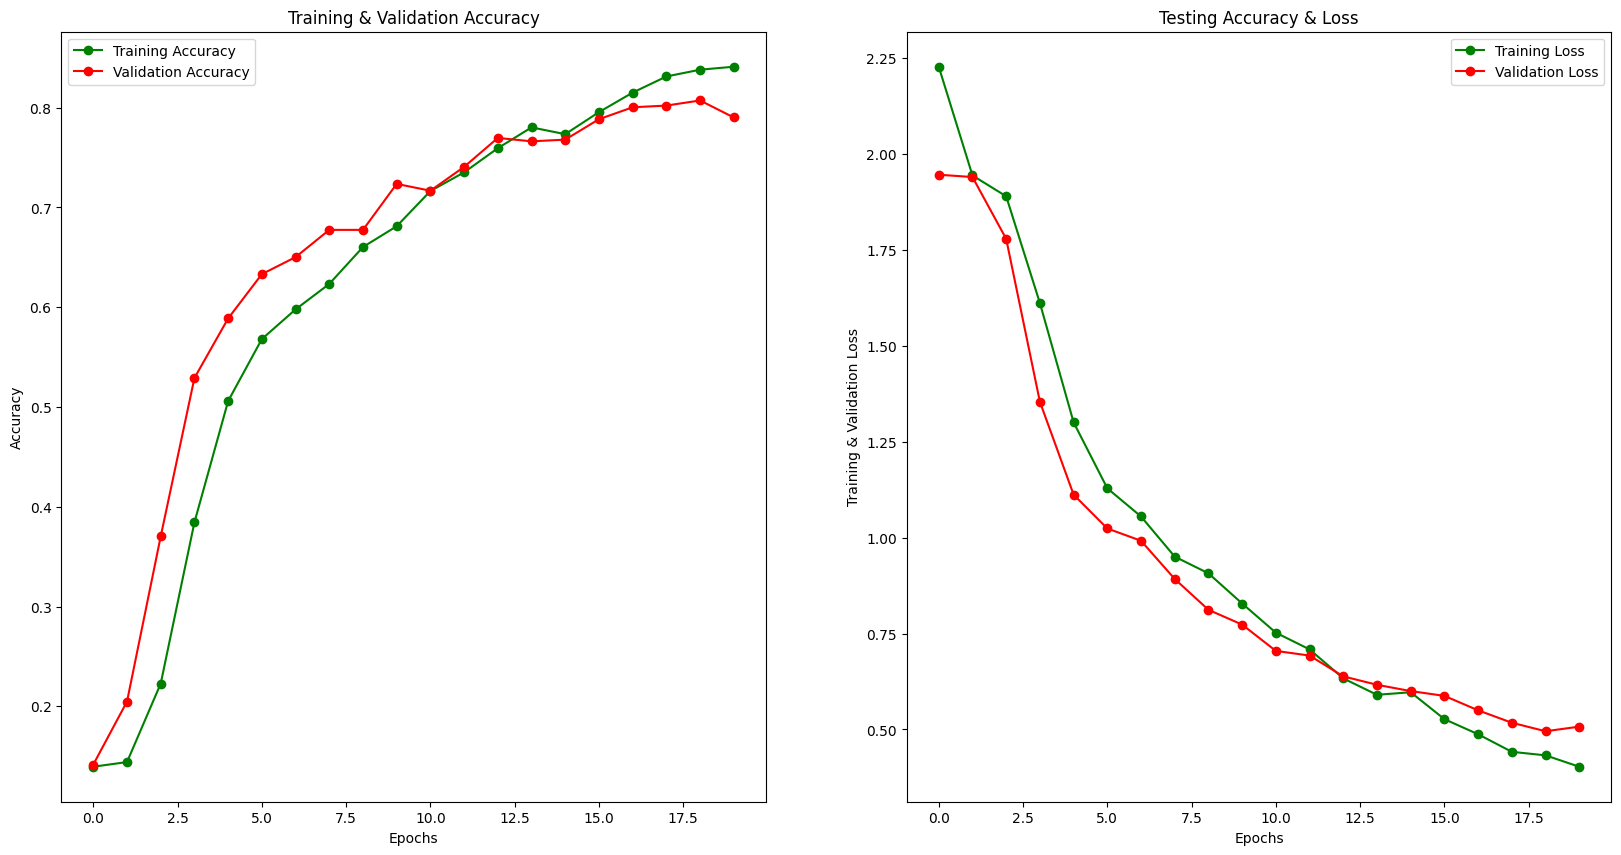

In [8]:
import matplotlib.pyplot as plt
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# Creating Confusion Matrix to know the performance of Model

In [ ]:
tr_predictions = emotion_model.predict(train_generator)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(train_generator.classes, tr_predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(train_generator.classes, tr_predictions.argmax(axis=1)))
clf_report = classification_report(train_generator.classes, tr_predictions.argmax(axis=1),output_dict=True)

In [ ]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
# do prediction on test data
predictions = emotion_model.predict(validation_generator)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(validation_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(validation_generator.classes, predictions.argmax(axis=1)))
clf_report1 = classification_report(validation_generator.classes, predictions.argmax(axis=1),output_dict=True)

In [ ]:
sns.heatmap(pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True)

In [ ]:
img = load_img("/content/data/test/happy/PrivateTest_10077120.jpg",target_size = (48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = emotion_model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(emotion_dict[img_index])

In [ ]:
def plot_multiclass_roc( prediction, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], prediction[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(predictions, validation_generator.classes, n_classes=7, figsize=(16, 10))